# Dynamic Programming 


Let's start by introducing dynamic programming. For this, we will use a simple problem called `cake eating`. We will use `dynamic programming` because there are problems where "things become much more complicated as soon as the environment in which we are searching for optimal decisions becomes uncertain.


We will use the cake eating problem because it is simple and has an analytical solution. We begin with an agent who has a certain resource (cake) that has a size $a_0$. In each period, the agent decides how much to take from this cake and consume, $c_t$. The budget constraint will be:

$$
a_0 \geq \sum_{t=0}^\infty c_t
$$

We can assume that the agent will consume all their resources, therefore: $a_0 = \sum_{t=0}^\infty c_t$. The total utility of the agent as of time $t = 0$ should be given by

$$
U_0 = \sum_{t=0}^\infty \beta^t u(c_t).
$$

Using a CRRA utility $u(c_t) = \frac{c_t^{\frac{1}{\gamma} - 1}}{1 - \frac{1}{\gamma}}$, where $\gamma$ is the intertemporal elasticity of substitution. The *dynamic optimization problem* can be write as:


$$
\max_{\{c_t\}_{t=0}^\infty} \sum_{t=0}^\infty \beta^t \frac{c_t^{\frac{1}{\gamma}-1}}{1 - \frac{1}{\gamma}} \quad \text{subject to} \quad a_0 = \sum_{t=0}^\infty c_t.
$$

The `all-in-one` solution is to try to to find the complete path of consumption $\{c_t\}_{t=0}^{\infty}$ in one step. Using the Lagrangean:

$$
\mathcal{L} = \sum_{t=0}^\infty \beta^t \frac{c_t^{\frac{1}{\gamma}-1}}{1-\frac{1}{\gamma}} + \lambda \left(a_0 - \sum_{t=0}^\infty c_t\right).
$$

The FOC: 

$$
\frac{\partial \mathcal{L}}{\partial c_t} = \beta^t c_t^{-\frac{1}{\gamma}} - \lambda = 0 \quad \text{for all} \; t = 0, 1, 2, \dots, \infty.
$$

Using the FOC

$$
\beta^t c_t^{-\frac{1}{\gamma}} = \beta^{t-1} c_{t-1}^{-\frac{1}{\gamma}} = \dots = c_0^{-\frac{1}{\gamma}}.
$$


$$
\Leftrightarrow c_t = \beta^t c_{t-1} = \dots = \beta^{t}c_0.
$$

Then, we can substitute $c_t$ in the constraint $a_0=\sum_{t=0}^{\infty}c_t$, and obtain: 


$$
a_0 = \sum_{t=0}^\infty \beta^t c_0 = c_0 \sum_{t=0}^\infty (\beta^t) = \frac{c_0}{1-\beta}.
$$

Finally, the consumption path is

$$
c_t = \beta^{t\gamma} \cdot (1 - \beta^{\gamma}) \cdot a_0.
$$




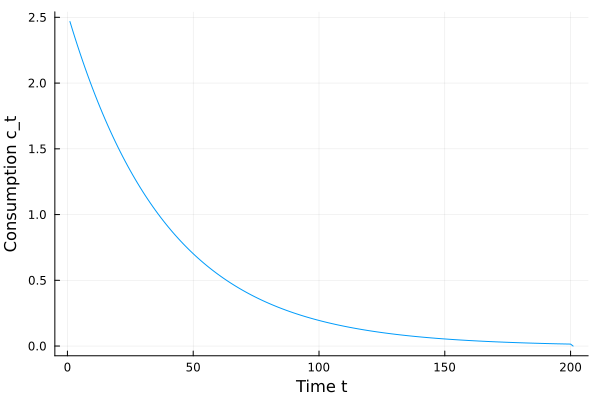

In [1]:
using Plots, Parameters

function params(; γ = 0.5,
    β = 0.95,
    a0 = 100.0,
    TT = 200)

    return (γ=γ, β=β, a0=a0, TT=TT)
end

function consumption!(p, c_t)
    @unpack TT, β, γ, a0 = p

    # Calculate the time path of consumption
    for it in 1:TT
        c_t[it] = β^(it * γ) * (1.0 - β^γ) * a0
    end
end

p = params(a0=100)
c_t = zeros(p.TT + 1)
consumption!(p, c_t)

# Plotting
plot(c_t, xlabel="Time t", ylabel="Consumption c_t", legend=false)



Solving the cake eating problem analytically is fortunately straightforward. However, when there is no analytical solution, we can tackle the exercise as in previous classes, using constrained/unconstrained optimization or a system of equations with the FOCs.


This problem can become tremendously large and computationally complex, which is why we use different approaches. We will start by presenting the dynamic problem, then we will introduce the techniques of Value Function Iteration and Policy Function.



```{note}
Fehr and Kindermann (2018) show how the problem is independent of time $t$, but only depends on the amount of resources $a_t$​. The sub-optimization problem: 

$$
\max_{\{c_v\}_{v=t}^\infty} U_t = \sum_{v=t}^\infty \beta^{v-t} u(c_v) \quad \text{s.t.} \quad a_t = \sum_{v=t}^\infty c_v
$$


The dynamic problem can be written as follows, where $V$ is the `value function`: 

$$
\max_{\{c_v\}_{v=t}^\infty} U_t \quad \text{s.t.} \quad a_t = \sum_{v=t}^\infty c_v
$$

$$
= \sum_{v=t}^\infty \beta^{v-t} \cdot u \left( (u')^{-1} \left[ \beta^{t-v} \cdot u'(f(a_t)) \right] \right)
$$

$$
= \sum_{v=0}^\infty \beta^v \cdot u \left( (u')^{-1} \left[ \beta^{-v} \cdot u'(f(a_t)) \right] \right) =: V(a_t)
$$

*In consequence, the maximum amount of utility the agent can derive from time $t$ onwards under the assumption that only an amount of at of his resources are left is independent of time $t$ and can be subsumed in the function $V(a_t)$ which only depends on the amount of remaining resources*.

```

The `Bellman equation`

$$
V(a_t) = \max_{c_t} \left\{ u(c_t) + \beta V(a_{t+1}) \right\} \quad \text{s.t.} \quad a_{t+1} = a_t - c_t.
$$

can be expressed without $t$ to avoid confusion between the actual path of consumption and the general solution to the dynamic program. 
$$
V(a) = \max_c \left\{ u(c) + \beta V(a^+) \right\} \quad \text{s.t.} \quad a^+ = a - c.
$$


The solution $V$ is a *fixpoint* of the functional equation $V(a)$. $c$ is the `control variable` (controls the reduction of the resource) and $a$ is the `state variable` (describes the state of the dynamic problem at time $t$). *The state variable connects the different periods*.   


The analytical solution
$$
\mathcal{L} = u(c) + \beta V(a^+) + \lambda [a - c - a^+].
$$


$$
\frac{\partial \mathcal{L}}{\partial c} = u'(c) - \lambda = 0 \quad \text{and} \quad \frac{\partial \mathcal{L}}{\partial a^+} = \beta V'(a^+) - \lambda = 0
$$

$$
u'(c) = \beta V'(a^+).
$$

with a few steps, we get

$$
a^+ = a \beta^\gamma \quad \text{and} \quad c = a(1 - \beta^\gamma).
$$


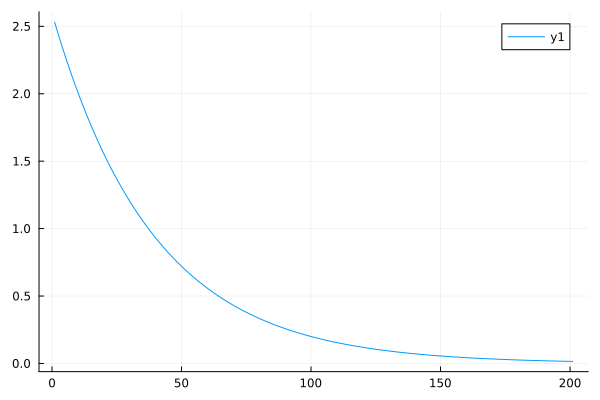

In [2]:
function params(; γ = 0.5,
    β = 0.95,
    a0 = 100.0,
    TT = 200,
    NA = 1000)
    eγ = 1.0 - 1.0 / γ
    a = collect(range(1, 100, NA))
    return (γ=γ, β=β, a0=a0, TT=TT, eγ=eγ, NA=NA, a=a)
end

function dynamics(p)
    @unpack TT, a0, β, γ = p 

    c_t = zeros(TT + 1)
    a_t = zeros(TT + 1)
    # Calculate the time path of consumption
    a_t[1] = a0
    c_t[1] = a_t[1] * (1.0 - β^γ)
    for it in 2:TT+1
        a_t[it] = a_t[it-1] - c_t[it-1]
        c_t[it] = a_t[it] * (1.0 - β^γ)
    end

    return a_t, c_t
end


p = params()
a_t, c_t = dynamics(p)
plot(a_t)
plot(c_t)

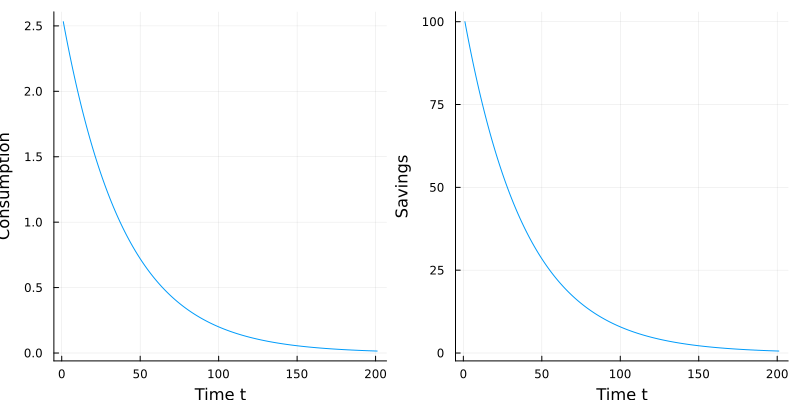

In [3]:
function params(; γ = 0.5,
    β = 0.95,
    a0 = 100.0,
    TT = 200,
    NA = 1000)
    eγ = 1.0 - 1.0 / γ
    a = collect(range(1, 100, NA))

    c_t = zeros(TT + 1)
    a_t = zeros(TT + 1)

    ap = zeros(NA)
    c = zeros(NA)
    V = zeros(NA)

    return (γ=γ, β=β, a0=a0, TT=TT, eγ=eγ, NA=NA, a=a, c_t=c_t, a_t=a_t, ap=ap, c=c, V=V)
end


function dynamics!(p)
    @unpack TT, a0, β, γ,c_t, a_t = p 

    # Calculate the time path of consumption
    a_t[1] = a0
    c_t[1] = a_t[1] * (1.0 - β^γ)
    for it in 2:TT+1
        a_t[it] = a_t[it-1] - c_t[it-1]
        c_t[it] = a_t[it] * (1.0 - β^γ)
    end

end

p = params()
dynamics!(p)

p1 = plot(p.c_t, xlabel="Time t", ylabel="Consumption", legend=false)
p2 = plot(p.a_t, xlabel="Time t", ylabel="Savings", legend=false)
plot(p1,p2, size=(800,400))

$$
a^+ = a \beta^\gamma \quad \text{and} \quad c = a(1 - \beta^\gamma).
$$


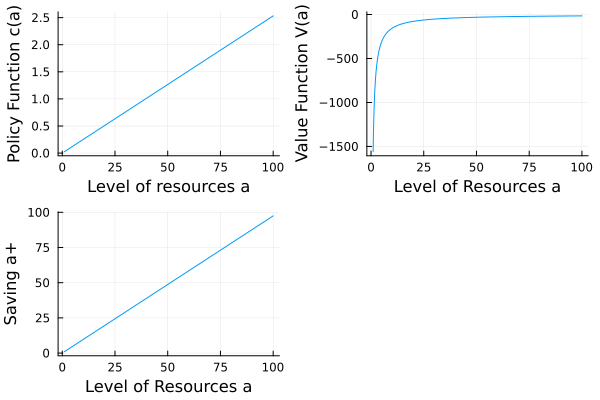

In [4]:
function policy!(p)
    @unpack NA, a0, β, γ, eγ, a, ap, c, V = p 

    # Calculate and plot policy and value function
    for ia in 1:NA
        ap[ia] = a[ia]*β^γ
        c[ia] = a[ia] * (1.0 - β^γ)
        V[ia] = ((1.0 - β^γ)^(-1.0 / γ)) * a[ia]^eγ / eγ
    end
end

policy!(p)
va = p.V
# Plot policy function
p1 = plot(p.a, p.c, xlabel="Level of resources a", ylabel="Policy Function c(a)", legend=false)

# Plot value function
p2 = plot(p.a, p.V, xlabel="Level of Resources a", ylabel="Value Function V(a)", legend=false)

#Plot future saving
p3 = plot(p.a, p.ap, xlabel="Level of Resources a", ylabel="Saving a+", legend=false)
plot(p1, p2, p3)

## Solution by value function iteration

In this section, we will solve the cake eating problem using Value Function Iteration (VFI) in the style of Fehr and Kindermann (2018) and Quantecon.

First of all, to solve this problem, we face the difficulty that the computer cannot handle arbitrary functions, as a function is an infinite-dimensional object. The computer cannot solve a dynamic programming problem on a *continuous state space*, e.g. $a \in [0,a_0]$.

We need to `discretize` the state space $a$ in a *grid*. For example, can be discretized in a equidistant grid $\hat{a}=a_0\frac{\nu}{n}$ for $\nu=0,1,\dots,n$.

The dynamic programming problem

$$
V(\hat{a}_v) = \max_c \{ u(c) + \beta V(a^+) \} \quad \text{s.t.} \quad a^+ = \hat{a}_v - c \quad \text{for all } v = 0, 1, \ldots, n.
$$

using the constraint directly into the function: 

$$
V(\hat{a}_v) = \max_{a^+} \{ u(\hat{a}_v - a^+) + \beta V(a^+) \} \quad \text{for } v = 0, 1, \ldots, n.
$$


Then we have to solve a set of decisions $\{c(\hat{a}_v)\}_{v=0}^n$ and $\{a^{+}(\hat{a}_v)\}_{v=0}^n$ (policy functions) and utility $\{V(\hat{a}_v)\}_{v=0}^n$


There are two relevant points when solving this optimization problem:
1. How can we determine the value function $V(a^{+})$ -> value function iteration. 
2. Knowing the value function $V(a^{+})$ , how can we come up with a solution to the optimization problems. 

The algorithm follows the *fix point iteration*: 

0. Discretize the state space $a$ in a grid $\hat{a_v}$. 
1. Initial guess of $V_0$, e.g. $V(a)=0$.  
2. Determinal the optimal policies $\{c(\hat{a}_v)\}_{v=0}^n$ and $\{a^{+}(\hat{a}_v)\}_{v=0}^n$ for all $\hat{a}_v$. 
3. Get the resulting value function $V_{\text{new}}(\hat{a}_v) = u\left(c(\hat{a}_v)\right) + \beta V\left(a^+(\hat{a}_v)\right) \quad \text{for } v = 0, 1, \ldots, n.$
4. Find the fixed point of the dynamic program -> check the criteria $\max_{\hat{a}_v} \left| \frac{V_{\text{new}}(\hat{a}_v) - V(\hat{a}_v)}{V(\hat{a}_v)} \right| < \epsilon $. If the $criteria\ge\epsilon$, update $V(a)$ using $V_{new}(a)$ and go back to step 2. 


Iter: 50 Convergence Level: 8.951194409198933
Iter: 100 Convergence Level: 0.68874943251285
Iter: 150 Convergence Level: 0.05299580805649384
Iter: 200 Convergence Level: 0.004077761140706571
Iter: 250 Convergence Level: 0.00031376323022414
Covergence is Ok: (iter, crit)(273, 9.643728344599367e-5)
  2.416267 seconds (549.60 k allocations: 1.076 GiB, 4.97% gc time, 14.70% compilation time)


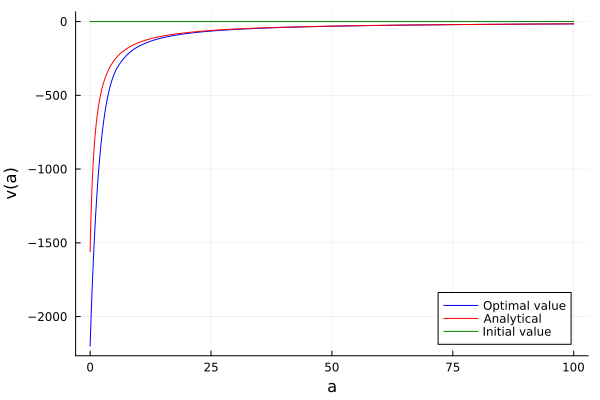

In [7]:
function params(; γ = 0.5,
    β = 0.95,
    a0 = 100.0,
    TT = 200,
    NA = 1000, 
    crit = 1e-4,
    itermax = 2000, 
    a_min  = 0.0,
    a_max = a0)

    eγ = 1.0 - 1.0 / γ
    a = collect(range(a_min, a_max, NA))

    ia_opt = zeros(NA)
    u_temp = zeros(NA)    

    return (γ=γ, β=β, a0=a0, TT=TT, eγ=eγ, NA=NA, a=a, crit=crit, itermax=itermax, ia_opt=ia_opt, u_temp=u_temp)
end

function u(p, c)
    @unpack eγ, β = p
    return c^eγ / eγ
end

function bellman!(p,v)
    @unpack NA, β, a, ia_opt, u_temp = p 
    ia_opt[1] = 1    
    v[1] = v[2] - 100.0
    # Calculate optimal decision for every grid point
    for ia in 2:NA
        for ia_p in 1:max(ia-1, 1)
            # Calculate consumption
            c_temp = max(a[ia] - a[ia_p], 1e-10)
            # Calculate utility
            u_temp[ia_p] = u(p, c_temp) + β * v[ia_p]
        end
        #Maximization
        V_max, index_max = findmax(u_temp[1:max(ia-1,1)])
        v[ia] = V_max
    end    

end

function VFI(p, v0)
    @unpack crit, itermax, a, NA, β, ia_opt, u_temp = p 
    v = copy(v0)
    v_new = copy(v0)

    # Iterate until value function converges
    for iter in 1:itermax
        #Update value
        v = copy(v_new)
        #New value v_new
        bellman!(p, v_new) 
        # Get convergence level
        valuediff = maximum(abs.(v_new .- v))
        if iter%50==0
            println("Iter: ", iter, " Convergence Level: ", valuediff)
        end
        # Check for convergence
        if valuediff < crit
            println("Covergence is Ok: (iter, crit)", (iter, valuediff))
            break
        end

        if iter == itermax
            println("Not convergence")
        end
    end

    return v
end

p = params()
v0 = zeros(p.NA)
@time v = VFI(p,v0);

plot(p.a, v, label="Optimal value", xlabel="a", ylabel="v(a)", color=:blue)
plot!(p.a, va, label="Analytical", color=:red)
plot!(p.a, v0, label="Initial value", color=:green)

### Solve VFI using interpolation


$$
V(\hat{a}_v) = \max_c \{ u(c) + \beta V(a^+) \} \quad \text{s.t.} \quad a^+ = \hat{a}_v - c \quad \text{for all } v = 0, 1, \ldots, n.
$$

The algorithm follows the *fix point iteration*: 

0. Discretize the state space $a$ in a grid $\hat{a_v}$. 
1. Initial guess of $V_0$, e.g. $V(a)=0$.  
3. Get the resulting value function $V_{\text{new}}(\hat{a}_v)$ using interpolation of $V(a^{+})$
4. Find the fixed point of the dynamic program -> check the criteria $\max_{\hat{a}_v} \left| V_{\text{new}}(\hat{a}_v) - V(\hat{a}_v) \right| < \epsilon. $. If the $criteria\ge\epsilon$, update $V(\hat{a_v})$ using $V_{new}(\hat{a_v})$ and go back to step 2. 


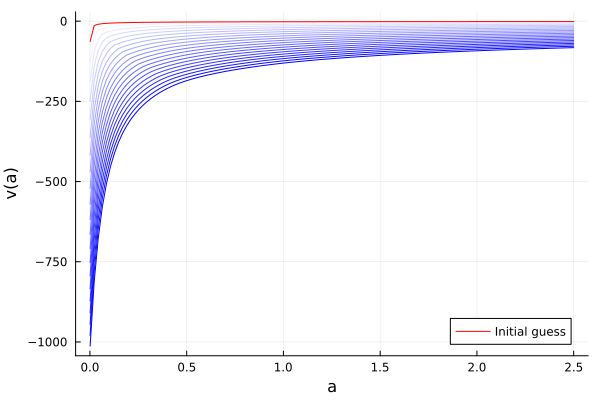

In [8]:
using Optim
using Interpolations

function params(;
        β=0.96, 
        γ=1.5, 
        a_grid_min=1e-3, 
        a_grid_max=2.5, 
        a_grid_size=120, 
        crit=1e-4,
        itermax=200)

    a_grid = range(a_grid_min, stop=a_grid_max, length=a_grid_size)
    return (β=β, γ=γ, a_grid=a_grid, crit=crit, itermax=itermax)
end

# Utility function
function u(p, c)
    @unpack γ = p
    if γ == 1.0
        return log.(c)
    else
        return (c.^(1 - γ)) ./ (1 - γ)
    end
end

function state_action_value(p, c, x, v_array)
    @unpack a_grid, β = p
    vp = LinearInterpolation(a_grid, v_array, extrapolation_bc = Line())  
    return -(u(p, c) + β * vp(x - c))
end

function T(v, p)
    @unpack a_grid = p
    v_new = similar(v)
    for (i, x) in enumerate(a_grid)
        objective = c -> state_action_value(p, c, x, v)
        result = optimize(objective, 1e-10, x) 
        v_new[i] = -Optim.minimum(result)
    end
    return v_new
end

p = params()
a_grid = p.a_grid
v = u(p,a_grid)       # Initial guess
n = 20                 # Number of iterations

p1 = plot(a_grid, v, label="Initial guess", color=:red)
for i in 1:n
    v = T(v, p)  # Apply the Bellman operator
    p1 = plot!(a_grid, v, xlabel="a", ylabel="v(a)", label="", color=:blue, alpha=(i/n))
end

plot(p1)

iter, vdiff: (25, 27.315312306314127)
iter, vdiff: (50, 10.098330629646625)
iter, vdiff: (75, 3.661005003941682)
iter, vdiff: (100, 1.321281965741946)
iter, vdiff: (125, 0.4763474203921305)
iter, vdiff: (150, 0.17168805355163386)
iter, vdiff: (175, 0.061877023913211815)
iter, vdiff: (200, 0.022300381327113428)
iter, vdiff: (225, 0.008036993313453422)
iter, vdiff: (250, 0.002896506791785214)
iter, vdiff: (275, 0.0010438916062867065)
iter, vdiff: (300, 0.0003762151136470493)
iter, vdiff: (325, 0.00013558669229496445)
Convergence ok, iter:333

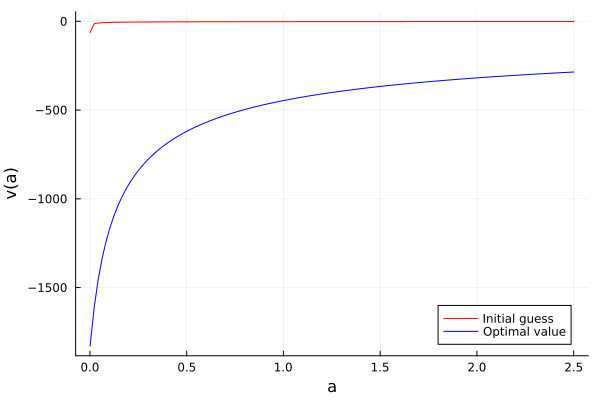

In [9]:
function VFI(p, v0)
    @unpack crit, itermax = p

    # Set up loop
    v = copy(v0)
    for i in 1:itermax
        v_new = T(v, p)
        vdiff = maximum(abs.(v - v_new))

        if vdiff<crit
            print("Convergence ok, iter:", i)
            break
        end

        if i%25==0
            println("iter, vdiff: ", (i, vdiff))
        end
        
        if i==itermax
            println("Not convergece")
        end

        #Update v0
        v = copy(v_new)
    end

    return v
end


p = params(itermax=1000)
a_grid = p.a_grid
v0 = u(p,a_grid)       # Initial guess
v_new = VFI(p, v0)

plot(a_grid, v0, xlabel="a", ylabel="v(a)", label="Initial guess", color=:red)
plot!(a_grid, v_new, label="Optimal value", color=:blue)

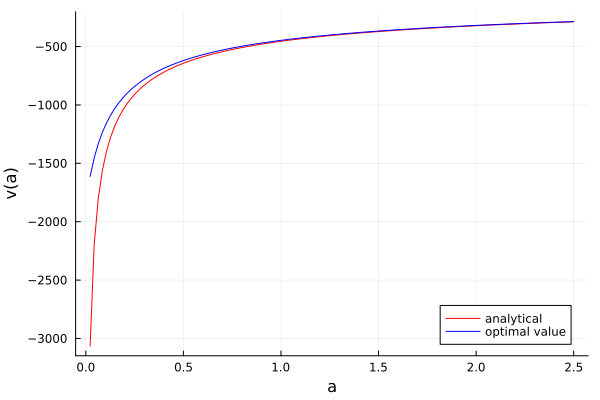

In [10]:
function v_star(p, x)
    @unpack β, γ = p
    return (1 - β ^ (1 / γ)) ^ (-γ) .* (x .^ (1 - γ) / (1 - γ))
end

vs = v_star(p,a_grid)

plot(a_grid[2:end], vs[2:end], xlabel="a", ylabel="v(a)", label="analytical", color=:red)
plot!(a_grid[2:end], v_new[2:end], xlabel="a", ylabel="v(a)", label="optimal value", color=:blue)

### Homework
Get the policy functions 

Analytically: 
$$
\sigma^*(x) = (1 - \beta^{1/\gamma}) x
$$

Solution using the optimal value function 
$$
\sigma(x) = \arg \max_{0 \leq c \leq x} \{u(c) + \beta u(x - c)\}
$$


## Solution by policy function iteration

The idea is solve the policy function: 

$$
\sigma(x) = \arg \max_{0 \leq c \leq x} \{u(c) + \beta u(x - c)\}
$$


The algorithm is 
1. Start with initial guess of the policy function, e.g. $c(a)=\frac{a}{2}$
2. Determine the optimal policies $\{ c_{new} (\hat{a}_v)\}_{v=0}^{n}$ for all $\hat{a}_v$ by solving the set of FOC: $u^{'}(c(\hat{a}_v)) = \beta u^{'}(c(a^+))$ , where $a^{+}=f(\hat{a}_v,c(\hat{a}_v))$. We get $a^{+}$ by interpolation.  
3. Check the convergence of $\max_{\hat{a}_v}\left| c_{new}(\hat{a}_v) - c(\hat{a}_v)  \right|<\epsilon$. 
4. If the $criteria\ge\epsilon$, update $c(a)$ using $c_{new}(a)$ and go back to step 2. 


In [2]:
using LinearAlgebra, Roots


function params(;
    β=0.96, 
    γ=1.5, 
    a_grid_min=1e-3, 
    a_grid_max=2.5, 
    a_grid_size=120, 
    crit=1e-4,
    itermax=200)

    a_grid = range(a_grid_min, stop=a_grid_max, length=a_grid_size)
    return (β=β, γ=γ, a_grid=a_grid, crit=crit, itermax=itermax)
end

function u_prime(p, c)
    @unpack γ = p
    if c<0 
        return -6666
    else
        return c^(-γ)
    end
end


function euler_diff(p, c, x, σ) #c:control, x:estado, σ:función de interpolación
    @unpack β = p
    # c = c[1]
    cp = σ(x - c) #f(a, c(a))
    return u_prime(p,c) - β * u_prime(p, cp)
# end



p = params()


(β = 0.96, γ = 1.5, a_grid = 0.001:0.021:2.5, crit = 0.0001, itermax = 200)

iter, vdiff: (25, 0.0004094352733778131)
iter, vdiff: (50, 0.0002991361693477079)
iter, vdiff: (75, 0.0001877976451882049)
iter, vdiff: (100, 0.00010704894602843462)
Convergence ok, iter:103

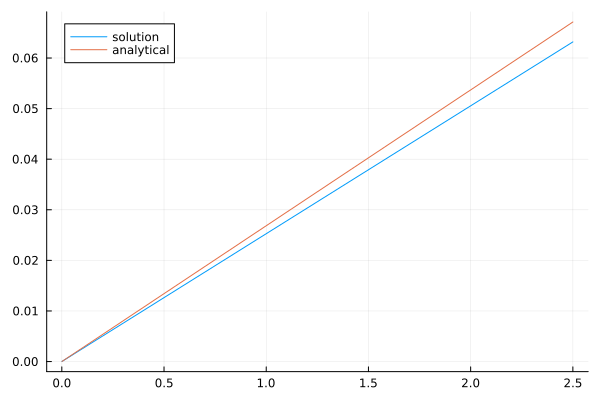

In [11]:
using LinearAlgebra, Roots #NLsolve, 

function params(;
    β=0.96, 
    γ=1.5, 
    a_grid_min=1e-3, 
    a_grid_max=2.5, 
    a_grid_size=120, 
    crit=1e-4,
    itermax=200)

    a_grid = range(a_grid_min, stop=a_grid_max, length=a_grid_size)
    return (β=β, γ=γ, a_grid=a_grid, crit=crit, itermax=itermax)
end

function u_prime(p, c)
    @unpack γ = p
    if c<0 
        return -6666
    else
        return c^(-γ)
    end
end

function euler_diff(p, c, x, σ)
    @unpack β = p
    # c = c[1]
    cp = σ(x - c)
    return u_prime(p,c) - β * u_prime(p, cp)
end

function K(σ0, p)
    @unpack β, a_grid = p

    σ_new = similar(σ0)
    σ = LinearInterpolation(a_grid, σ0, extrapolation_bc = Line())  
    # σ = x -> LinearAlgebra.interp(x, x_grid, σ_array)
    for (i, x) in enumerate(a_grid)
        # handle small x separately --- helps numerical stability
        if x < 1e-12
            σ_new[i] = 0.0
        # handle other x
        else
            # res = nlsolve(c -> euler_diff(p,c,x,σ), [σ0[2]], autodiff = :forward) # 
            res = find_zero(c -> euler_diff(p,c,x,σ), (1e-10, x), Bisection())
            σ_new[i] = res#.zero[1]
        end
    end

    return σ_new
end

function PFI(p, σ0)
    @unpack crit, itermax = p

    # Set up loop
    σ = copy(σ0)
    for i in 1:itermax
        σ_new = K(σ, p)
        σdiff = maximum(abs.(σ - σ_new))

        if σdiff<crit
            print("Convergence ok, iter:", i)
            break
        end

        if i%25==0
            println("iter, vdiff: ", (i, σdiff))
        end
        
        if i==itermax
            println("Not convergece")
        end

        #Update σ
        σ = copy(σ_new)
    end

    return σ
end

p = params(a_grid_min=1e-3)
a_grid = p.a_grid
c = a_grid
p1 = plot(a_grid, c, label="init")
for i in 1:15
    c = K(c, p)
    p1 = plot!(a_grid,c, label="")
end


ca(p, a) = (1 - p.β^(1/p.γ)) .* a
c_an = ca(p, a_grid)

c = PFI(p, c_an./2)

plot(a_grid, c, label="solution")
plot!(a_grid,c_an, label="analytical")

### Homework
1. Given the solution of the policy function $c(\hat{a}_v)$, obtain $a^{+}$. 
2. Get the optimal value function. 
3. Compare the result ${c,a^{+},V}$ of VFI with index, VFI with interpolation, and PFI.  